## Machine Learning for informing climate change

The CalCOFI dataset represents the longest (1949 - present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data captured in the world. This database contains oceanographic data measured using CTD casts from seawater samples collected at CalCOFI stations. 

CTD stands for conductivity, temperature, and depth, and refers to a package of electronic instruments that measure oceanographic properties (i.e., the physical features of seawater such as salinity, dissolved oxygen, chlorophyll-a, nutrients, and many more). A CTD cast gives scientists a precise and comprehensive charting of the distribution and variation of water oceanographic properties that helps to understand how the oceans affect life. 

Salinity plays a key role in analyzing the water cycle, ocean circulation, and climate change, as it drives ocean currents and circulation patterns. Variations in salinity affect the density of seawater, which in turn influences its movement and mixing. Many marine organisms have adapted to specific salinity levels, so variations in salinity can directly impact their distribution, reproduction, and survival.

### Obtaining the data

The dataset used for this project can be downloaded from :
https://drive.google.com/file/d/1EspgcE5t9VHvk338_uNesCfhNZWDPVnB/view?usp=drive_link

The dataset contains 325,281 rows and 16 oceanographic features and one outcome variable - salinity of the water (Salnty). Description of all the variables:

1. Salnty: Salinity (Practical Salinity Scale 1978) (outcome) 
2. Depthm: cast depth in meters
3. O2mlL: Milliliters oxygen per liter of seawater
4. STheta: Potential Density (Sigma Theta), Kg/M3
5. O2Sat: Oxygen percent saturation
6. Oxyμmol/Kg: Oxygen micromoles per kilogram seawater
7. ChlorA: Migrograms Chlorophyll-a per liter seawater, measured fluorometrically 
8. Phaeop: Micrograms Phaeopigment per liter seawater, measured fluormetrically 
9. PO4uM: Micromoles Phosphate per liter of seawater
10. SiO3uM: Micromoles Silicate per liter of seawater
11. NO2uM: Micromoles Nitrite per liter of seawater
12. NH3uM: Micromoles Ammonia per liter of seawater
13. C14As1: 14C Assimilation of Replicate 1 (milligrams carbon per cubic meter of seawater per half light day)
14. C14As2: 14C Assimilation of Replicate 2 (milligrams carbon per cubic meter of seawater per half light day)
15. DarkAs: 14C Assimilation of Dark/Control Bottle (milligrams carbon per cubic meter of seawater per half light day)
16. LightP : Light intensities of the incubation tubes in the primary productivity experiment, expressed as percentages
17. Year: The year the sample was collected

In this project, I will attempt to use a linear regression model to predict the salinity of the ocean water based on the 16 features, analyze its efficacy and explore alternatives. For this purpose, I will be using the data from 1980-2013 as the training data and test the model on the data from 2014-2016. 

In [1]:
df <- read.csv("final.csv")
head(df)

,Depthm,Salnty,O2ml_L,STheta,O2Sat,Oxymol,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,NH3uM,C14As1,C14As2,DarkAs,LightP,Year
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,33.418,NA,24.287,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1980
2,10,33.419,NA,24.302,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1980
3,20,33.420,NA,24.318,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1980
4,30,33.400,NA,24.410,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1980
5,40,33.380,NA,24.470,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1980
6,50,33.360,NA,24.503,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1980


### Exploratory Data Analysis and Pre-processing

In [2]:
summary(df)

     Depthm           Salnty          O2ml_L           STheta      
 Min.   :   0.0   Min.   :28.43   Min.   :-0.010   Min.   : 20.93  
 1st Qu.:  32.0   1st Qu.:33.39   1st Qu.: 2.040   1st Qu.: 24.86  
 Median : 100.0   Median :33.67   Median : 3.970   Median : 25.81  
 Mean   : 165.1   Mean   :33.70   Mean   : 3.759   Mean   : 25.69  
 3rd Qu.: 250.0   3rd Qu.:34.07   3rd Qu.: 5.690   3rd Qu.: 26.55  
 Max.   :4442.0   Max.   :37.03   Max.   :11.130   Max.   :250.78  
                  NA's   :3270    NA's   :26357    NA's   :5510    
     O2Sat            Oxymol            ChlorA           Phaeop      
 Min.   : -0.10   Min.   : -0.435   Min.   : 0.00    Min.   :-3.89   
 1st Qu.: 30.80   1st Qu.: 88.742   1st Qu.: 0.05    1st Qu.: 0.05   
 Median : 62.60   Median :172.421   Median : 0.16    Median : 0.11   
 Mean   : 62.63   Mean   :163.631   Mean   : 0.44    Mean   : 0.19   
 3rd Qu.:101.00   3rd Qu.:247.942   3rd Qu.: 0.39    3rd Qu.: 0.23   
 Max.   :214.10   Max.   :485.702   

From the above summary, it is clear that each column has a lot of NA values. So first, I am attempting to clean the data. Salnty has 3270 NA values, and since this is the outcome variable, these rows have to be deleted since they cannot be used to create or evaluate the model.

In [3]:
df <- subset(df, !is.na(df$Salnty))
summary(df)
nrow(df)

     Depthm           Salnty          O2ml_L           STheta      
 Min.   :   0.0   Min.   :28.43   Min.   :-0.010   Min.   : 20.93  
 1st Qu.:  35.0   1st Qu.:33.39   1st Qu.: 2.040   1st Qu.: 24.86  
 Median : 101.0   Median :33.67   Median : 3.970   Median : 25.81  
 Mean   : 166.4   Mean   :33.70   Mean   : 3.758   Mean   : 25.69  
 3rd Qu.: 250.0   3rd Qu.:34.07   3rd Qu.: 5.690   3rd Qu.: 26.55  
 Max.   :4442.0   Max.   :37.03   Max.   :11.130   Max.   :250.78  
                                  NA's   :23312    NA's   :2240    
     O2Sat            Oxymol            ChlorA           Phaeop      
 Min.   : -0.10   Min.   : -0.435   Min.   : 0.00    Min.   :-3.89   
 1st Qu.: 30.80   1st Qu.: 88.742   1st Qu.: 0.05    1st Qu.: 0.05   
 Median : 62.60   Median :172.421   Median : 0.16    Median : 0.11   
 Mean   : 62.63   Mean   :163.631   Mean   : 0.44    Mean   : 0.19   
 3rd Qu.:101.00   3rd Qu.:247.942   3rd Qu.: 0.39    3rd Qu.: 0.23   
 Max.   :214.10   Max.   :485.702   

[1] 322011

Total number of rows = 322011
We see that for the following features:
* NH3uM  missing: 257052  =   79.82%
* C14As1  missing: 309085  =  95.99 %
* C14As2  missing: 309085  =  95.99 %
* DarkAs  missing: 301921  =  93.76%
* LightP  missing: 305931  =  95.01 %

a large proportion of the samples have NA values. Thus, these features cannot be used to build an effective model, and have to be dropped from the dataset.

In [4]:
df <- subset(df, select = -c(12, 13, 14, 15, 16))
summary(df)

     Depthm           Salnty          O2ml_L           STheta      
 Min.   :   0.0   Min.   :28.43   Min.   :-0.010   Min.   : 20.93  
 1st Qu.:  35.0   1st Qu.:33.39   1st Qu.: 2.040   1st Qu.: 24.86  
 Median : 101.0   Median :33.67   Median : 3.970   Median : 25.81  
 Mean   : 166.4   Mean   :33.70   Mean   : 3.758   Mean   : 25.69  
 3rd Qu.: 250.0   3rd Qu.:34.07   3rd Qu.: 5.690   3rd Qu.: 26.55  
 Max.   :4442.0   Max.   :37.03   Max.   :11.130   Max.   :250.78  
                                  NA's   :23312    NA's   :2240    
     O2Sat            Oxymol            ChlorA           Phaeop      
 Min.   : -0.10   Min.   : -0.435   Min.   : 0.00    Min.   :-3.89   
 1st Qu.: 30.80   1st Qu.: 88.742   1st Qu.: 0.05    1st Qu.: 0.05   
 Median : 62.60   Median :172.421   Median : 0.16    Median : 0.11   
 Mean   : 62.63   Mean   :163.631   Mean   : 0.44    Mean   : 0.19   
 3rd Qu.:101.00   3rd Qu.:247.942   3rd Qu.: 0.39    3rd Qu.: 0.23   
 Max.   :214.10   Max.   :485.702   

For the remaining missing values, I'm filling them with the mean values of the respective columns.

In [5]:
for (i in 1 : 12){
  df[which(is.na(df[i])), i] <- colMeans(df, na.rm = TRUE)[i]
}
summary(df)

     Depthm           Salnty          O2ml_L           STheta      
 Min.   :   0.0   Min.   :28.43   Min.   :-0.010   Min.   : 20.93  
 1st Qu.:  35.0   1st Qu.:33.39   1st Qu.: 2.193   1st Qu.: 24.86  
 Median : 101.0   Median :33.67   Median : 3.758   Median : 25.79  
 Mean   : 166.4   Mean   :33.70   Mean   : 3.758   Mean   : 25.69  
 3rd Qu.: 250.0   3rd Qu.:34.07   3rd Qu.: 5.650   3rd Qu.: 26.54  
 Max.   :4442.0   Max.   :37.03   Max.   :11.130   Max.   :250.78  
     O2Sat            Oxymol             ChlorA            Phaeop       
 Min.   : -0.10   Min.   : -0.4349   Min.   :-0.0010   Min.   :-3.8900  
 1st Qu.: 33.30   1st Qu.: 95.6516   1st Qu.: 0.1100   1st Qu.: 0.0800  
 Median : 62.64   Median :163.6312   Median : 0.4395   Median : 0.1908  
 Mean   : 62.64   Mean   :163.6312   Mean   : 0.4395   Mean   : 0.1908  
 3rd Qu.:100.50   3rd Qu.:246.1283   3rd Qu.: 0.4395   3rd Qu.: 0.1908  
 Max.   :214.10   Max.   :485.7018   Max.   :66.1100   Max.   :10.6600  
     PO4uM   

### Splitting the data

I am spliiting the data such that the data from 1980 - 2013 is the training set, and the data from 2014 - 2016 is the test set.

In [6]:
traindf <- df[df["Year"] <= 2013, ]
testdf <- df[df["Year"] > 2013, ]
cat("Number of rows in training set :", nrow(traindf), "\n")
cat("Number of rows in test set :", nrow(testdf))

Number of rows in training set : 298558 
Number of rows in test set : 23453

### Plots and correlations

In [7]:
library(ggplot2)

In [8]:
p1 <- ggplot(data = df) + geom_point(aes(x = Depthm, y = Salnty))
p2 <- ggplot(data = df) + geom_point(aes(x = O2ml_L, y = Salnty))
p3 <- ggplot(data = df) + geom_point(aes(x = STheta, y = Salnty))
p4 <- ggplot(data = df) + geom_point(aes(x = O2Sat, y = Salnty))

p5 <- ggplot(data = df) + geom_point(aes(x = Oxymol, y = Salnty))
p6 <- ggplot(data = df) + geom_point(aes(x = ChlorA, y = Salnty))
p7 <- ggplot(data = df) + geom_point(aes(x = Phaeop, y = Salnty))
p8 <- ggplot(data = df) + geom_point(aes(x = PO4uM, y = Salnty))

p9 <- ggplot(data = df) + geom_point(aes(x = SiO3uM, y = Salnty))
p10 <- ggplot(data = df) + geom_point(aes(x = NO2uM, y = Salnty))
p11 <- ggplot(data = df) + geom_point(aes(x = Year, y = Salnty))

In [9]:
library(patchwork)

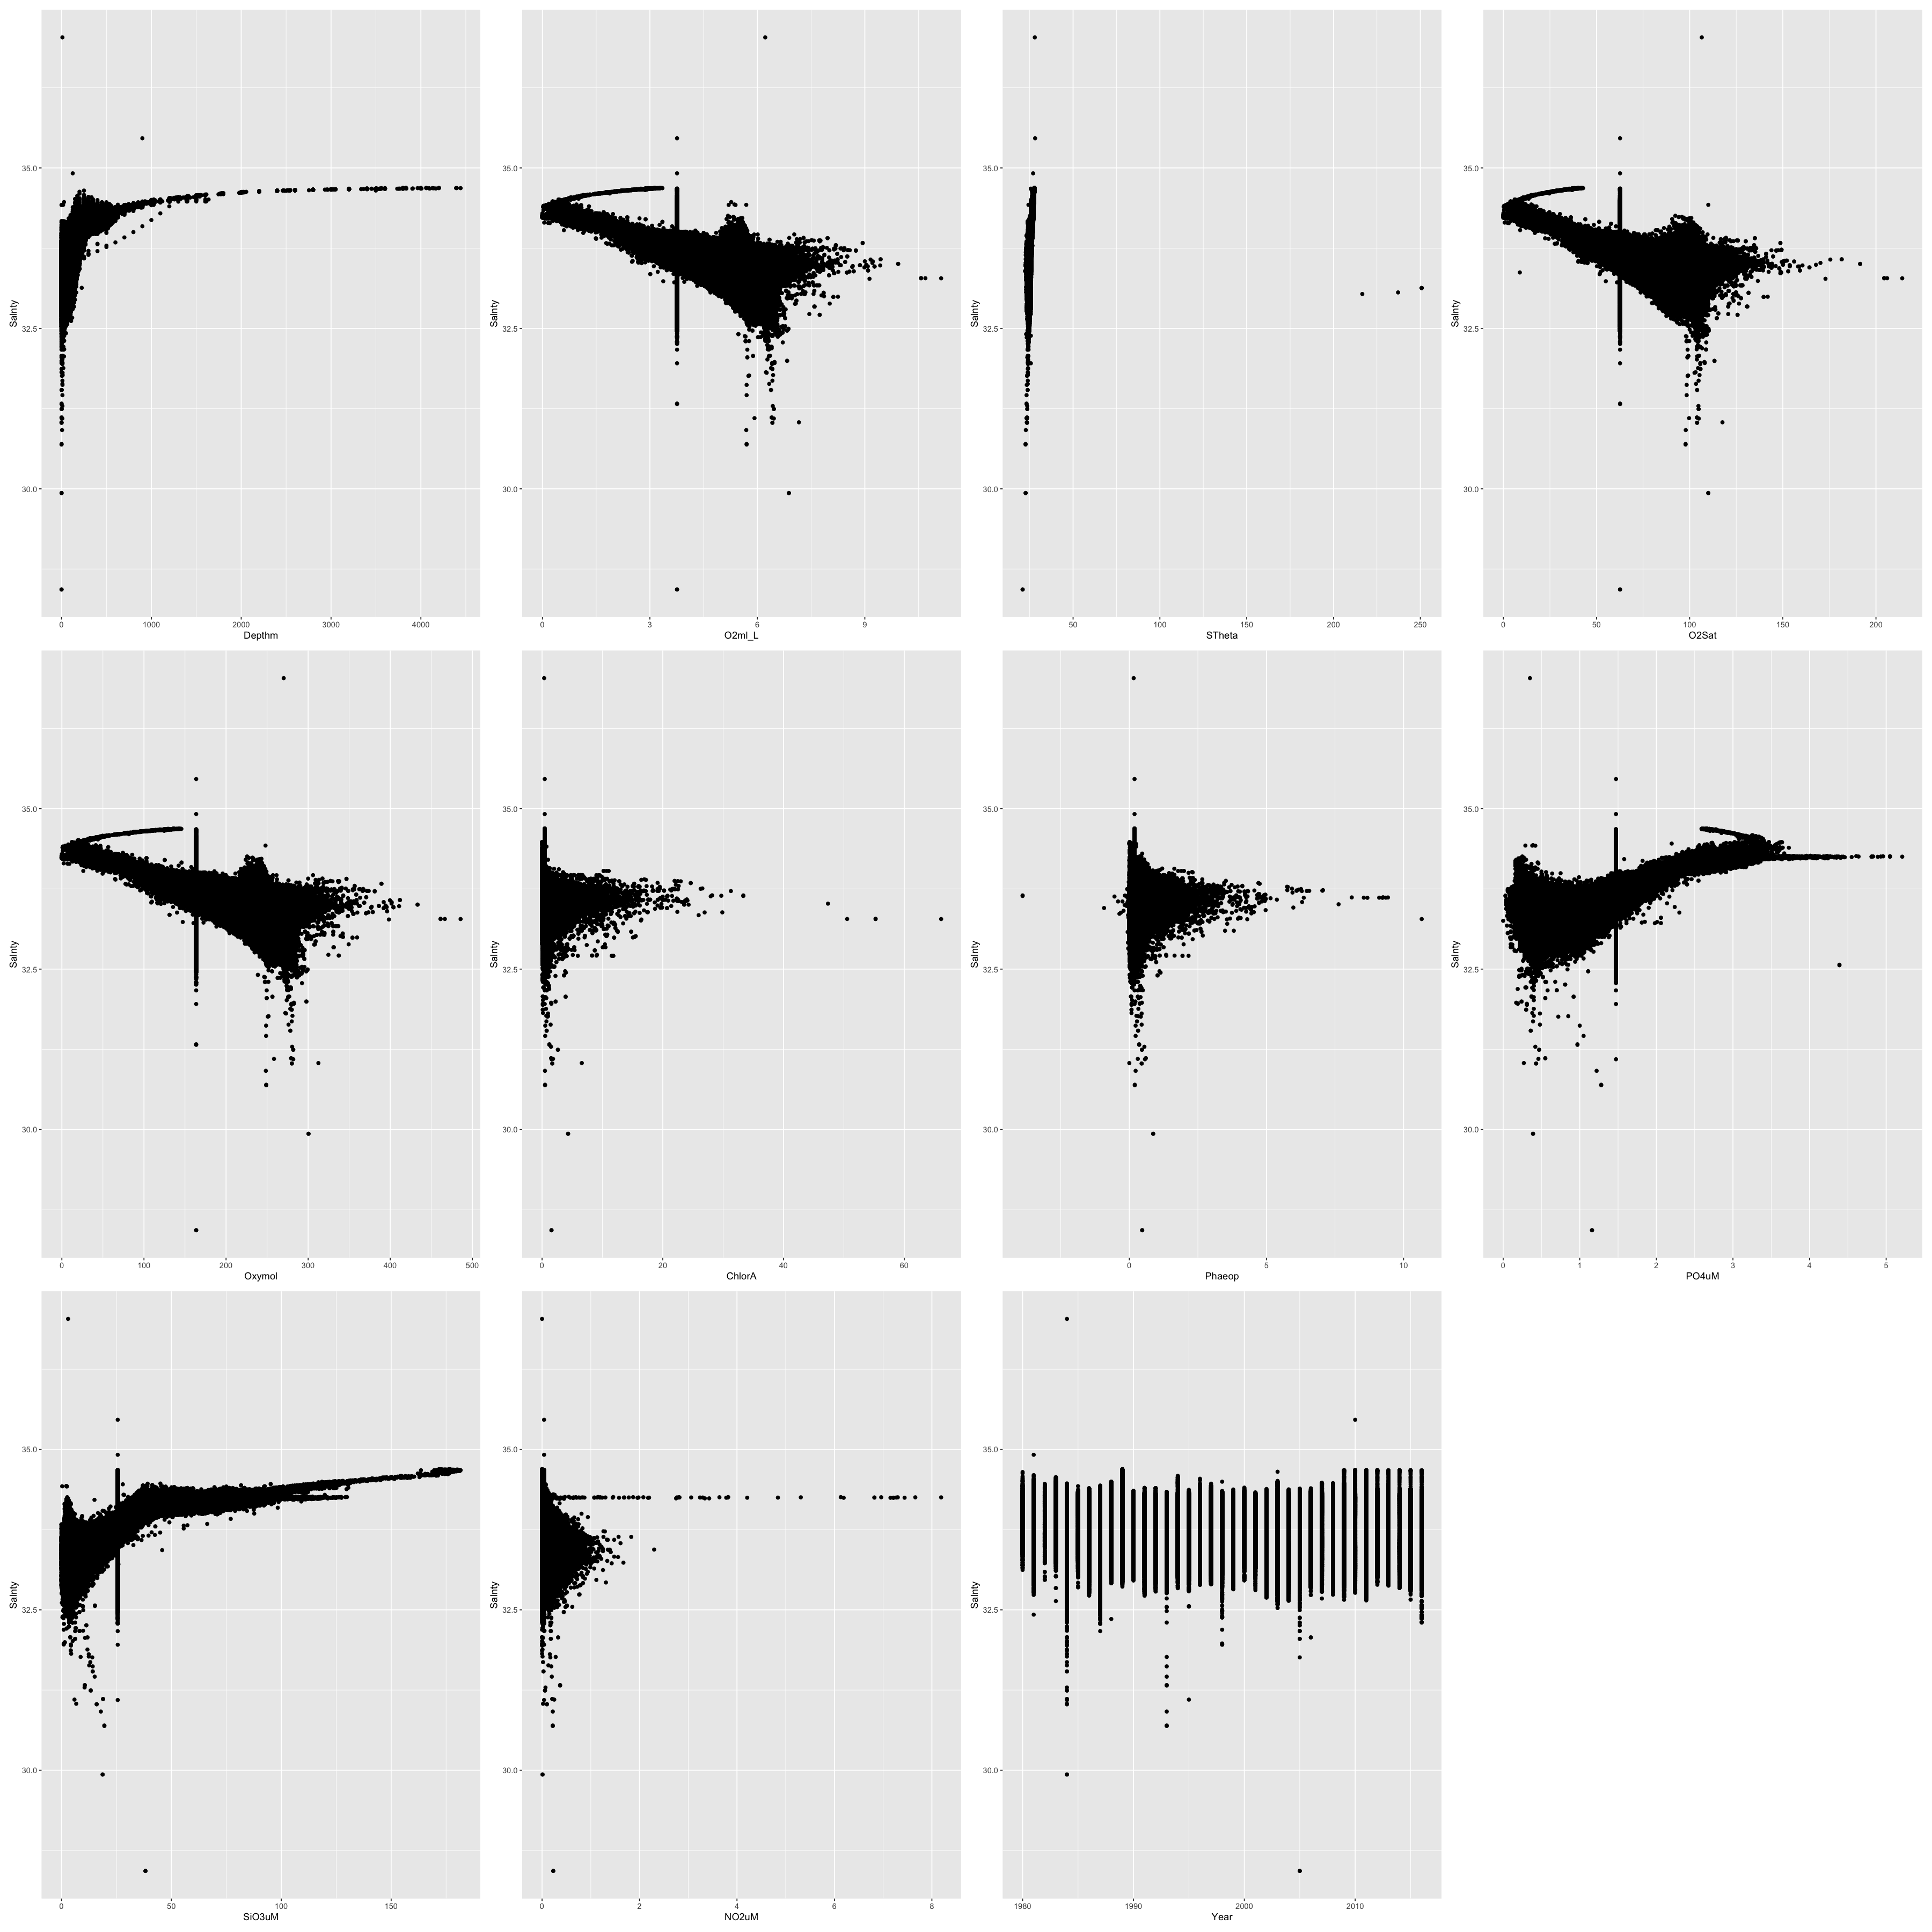

In [13]:
plots <- p1 + p2 + p3 + p4 + p5 + p6 + p7 + p8 + p9 + p10 + p11
options(repr.plot.width = 30, repr.plot.height = 30)
wrap_plots(plots)

In [11]:
library(corrplot)

corrplot 0.92 loaded



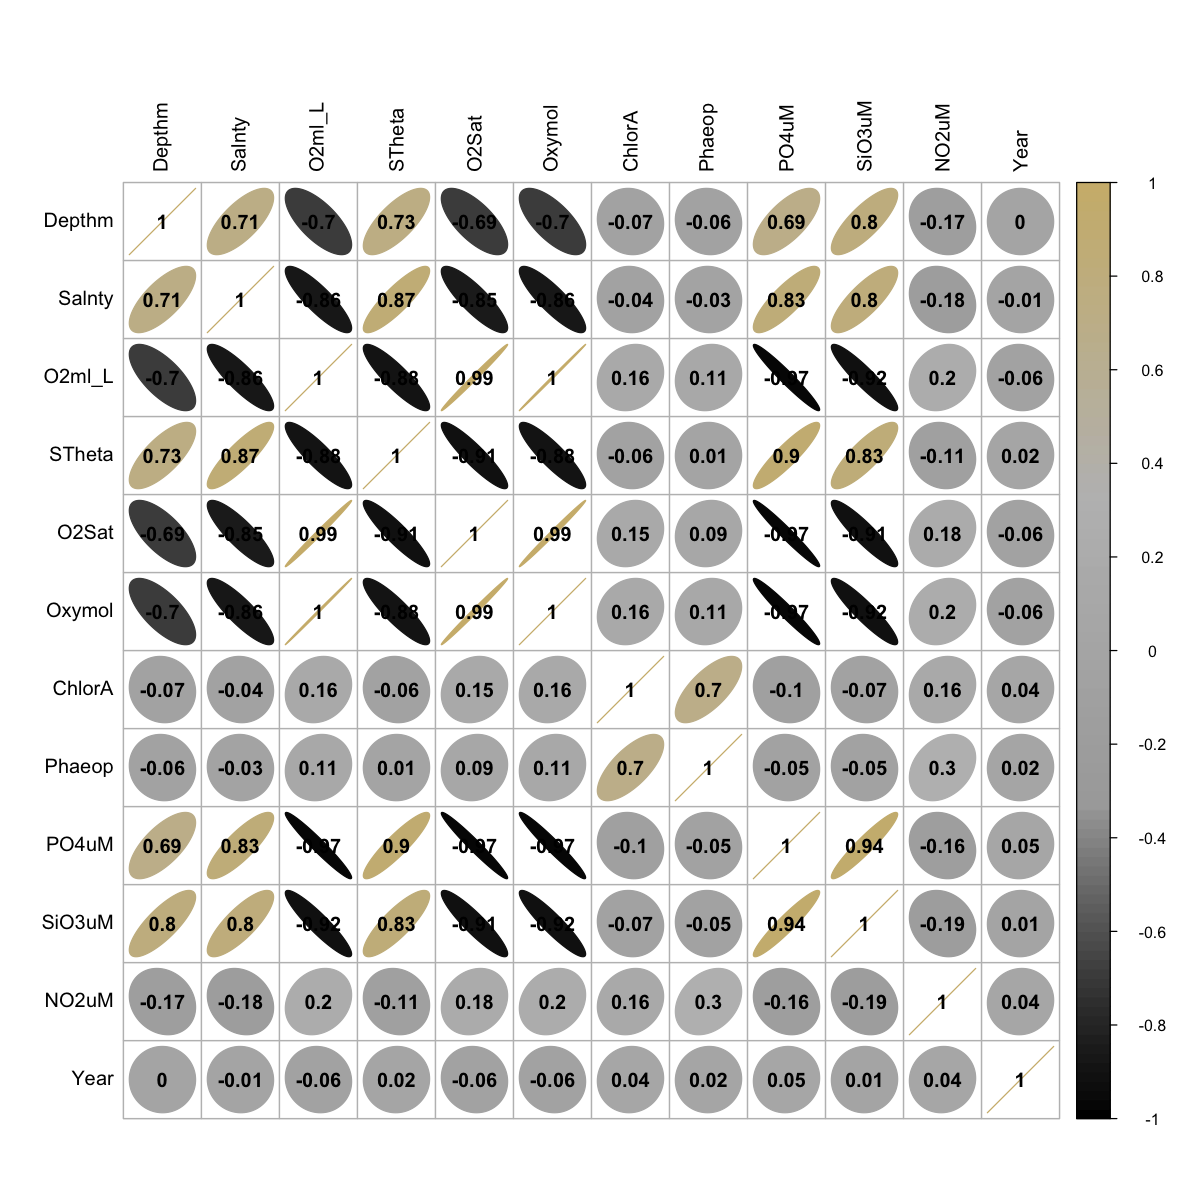

In [15]:
col4 <- colorRampPalette(c("black", "darkgrey", "grey", "#CFB87C"))
par(bg = "white")
options(repr.plot.width = 10, repr.plot.height = 10)
corrplot(cor(traindf), method = "ellipse", col = col4(100),
         addCoef.col = "black", tl.col = "black")
         

From the second row of the above correlation plot (which corresponds to correlation with Salnty), we see that almost all except 4 features seem highly linearly correlated with the outcome. From the rest of the plot, we see that some of the features seem to be intra-correlated as well, so I suspect some of the features might be redundant in fitting a linear regression model.

### Multiple Linear Regression modelling

Starting off with fitting a full linear model with all the features.

In [17]:
fullmodel <- lm(Salnty ~ ., data = traindf)
summary(fullmodel)


Call:
lm(formula = Salnty ~ ., data = traindf)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8546 -0.0649  0.0088  0.0682  5.1596 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  2.513e+01  5.867e-02  428.342  < 2e-16 ***
Depthm       1.175e-04  2.562e-06   45.878  < 2e-16 ***
O2ml_L      -1.805e-01  3.295e-03  -54.787  < 2e-16 ***
STheta       4.808e-01  9.203e-04  522.423  < 2e-16 ***
O2Sat        5.473e-02  1.174e-04  466.293  < 2e-16 ***
Oxymol      -1.811e-02  8.638e-05 -209.656  < 2e-16 ***
ChlorA       1.598e-02  3.696e-04   43.249  < 2e-16 ***
Phaeop       5.132e-03  1.541e-03    3.330 0.000868 ***
PO4uM        1.107e-01  1.641e-03   67.469  < 2e-16 ***
SiO3uM      -6.464e-03  4.399e-05 -146.931  < 2e-16 ***
NO2uM       -8.784e-03  2.672e-03   -3.287 0.001013 ** 
Year        -1.796e-03  2.550e-05  -70.443  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1302 on 298546 degre

## F and t-tests

The full F-test has the following as the null and alternative hypotheses:
\begin{align*}
H_0 &: \beta_1 = \beta_2 = .. = \beta_{11} = 0 \\
H_1 &: \beta_k \neq 0 \text{ for some k in 1, 2, .. 11} 
\end{align*}

From the summary of the above full model, we see that the F-statistic for the full model is 2.325e+05 which is very large. The p-value for this is very small (< 2.2e-16). Thus, the null hypothesis that none of the features are necessary, can be rejected. This shows that atleast some of the feature variables are necessary to model the salinity of the ocean water.

We also see that the p-values of the t-tests of all the features are very small (<0.05), suggesting that all of them might be useful in predicting the outcome, but a more rigorous analysis needs to be done to see if some of them can be removed. Further down, I will be performing model diagnostics and model selection to identify a reduced model.

Now, partial F-tests for each feature need to be done individually. The partial (individual) F-test for a feature k is as follows:
\begin{align*}
H_0 &: \beta_i = 0 \text{ for i $\neq$ k}\\
H_1 &: \beta_i \neq 0 \text{ for some i $\neq$ k} 
\end{align*}

In [18]:
partial1 <- lm(Salnty ~ Depthm, data = traindf)
partial2 <- lm(Salnty ~ O2ml_L, data = traindf)
partial3 <- lm(Salnty ~ STheta, data = traindf)
partial4 <- lm(Salnty ~ O2Sat, data = traindf)

partial5 <- lm(Salnty ~ Oxymol, data = traindf)
partial6 <- lm(Salnty ~ ChlorA, data = traindf)
partial7 <- lm(Salnty ~ Phaeop, data = traindf)
partial8 <- lm(Salnty ~ PO4uM, data = traindf)

partial9 <- lm(Salnty ~ SiO3uM, data = traindf)
partial10 <- lm(Salnty ~ NO2uM, data = traindf)
partial11 <- lm(Salnty ~ Year, data = traindf)

anova(partial1, fullmodel)
anova(partial2, fullmodel)
anova(partial3, fullmodel)
anova(partial4, fullmodel)

anova(partial5, fullmodel)
anova(partial6, fullmodel)
anova(partial7, fullmodel)
anova(partial8, fullmodel)

anova(partial9, fullmodel)
anova(partial10, fullmodel)
anova(partial11, fullmodel)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,23736.301,NA,NA,NA,NA
2,298546,5064.784,10,18671.52,110060.1,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,12529.173,NA,NA,NA,NA
2,298546,5064.784,10,7464.389,43999.18,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,12109.072,NA,NA,NA,NA
2,298546,5064.784,10,7044.287,41522.87,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,13370.711,NA,NA,NA,NA
2,298546,5064.784,10,8305.927,48959.66,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,12563.277,NA,NA,NA,NA
2,298546,5064.784,10,7498.492,44200.2,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,48363.200,NA,NA,NA,NA
2,298546,5064.784,10,43298.42,255224.5,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,48407.427,NA,NA,NA,NA
2,298546,5064.784,10,43342.64,255485.2,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,14895.915,NA,NA,NA,NA
2,298546,5064.784,10,9831.13,57950.04,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,17275.336,NA,NA,NA,NA
2,298546,5064.784,10,12210.55,71975.65,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,46836.317,NA,NA,NA,NA
2,298546,5064.784,10,41771.53,246224.2,0


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,298556,48439.891,NA,NA,NA,NA
2,298546,5064.784,10,43375.11,255676.5,0


From the partial F-tests of each feature, we see that the p-values for each of the reduced models with only one feature is very small (last column of secomd row of each anova table = almost 0), which shows that the null hypothesis for each of the partial F-tests, which states that the model can be explained using just that one variable, needs to be rejected. Thus, the alternate hypothesis that a combination of features is necessary is accepted.

### Model Selection

#### Backward selection
First, I'm going to try backward selection with $\alpha_{crit} = 0.15$. In backward selection, we start with the full model, and update the model step-by-step; at each step, the feature with the highest p-value ($>\alpha_{crit}$) is removed.

In [19]:
summary(fullmodel)


Call:
lm(formula = Salnty ~ ., data = traindf)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8546 -0.0649  0.0088  0.0682  5.1596 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  2.513e+01  5.867e-02  428.342  < 2e-16 ***
Depthm       1.175e-04  2.562e-06   45.878  < 2e-16 ***
O2ml_L      -1.805e-01  3.295e-03  -54.787  < 2e-16 ***
STheta       4.808e-01  9.203e-04  522.423  < 2e-16 ***
O2Sat        5.473e-02  1.174e-04  466.293  < 2e-16 ***
Oxymol      -1.811e-02  8.638e-05 -209.656  < 2e-16 ***
ChlorA       1.598e-02  3.696e-04   43.249  < 2e-16 ***
Phaeop       5.132e-03  1.541e-03    3.330 0.000868 ***
PO4uM        1.107e-01  1.641e-03   67.469  < 2e-16 ***
SiO3uM      -6.464e-03  4.399e-05 -146.931  < 2e-16 ***
NO2uM       -8.784e-03  2.672e-03   -3.287 0.001013 ** 
Year        -1.796e-03  2.550e-05  -70.443  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1302 on 298546 degre

The p-values of every feature is less than $\alpha_{crit}$. Thus, according to backward selection, the best model is the full model itself.

#### Model selection using "regsubsets"
I am going to compute the best model of size 1, best model of size 2, etc. up through the best model of size 11 (full model). I will then compare these 11 best models on the basis of their MSPE, BIC and R2a values to decide the best model.

In [20]:
library(leaps)

In [21]:
reg <- regsubsets(Salnty ~ ., data = traindf, nvmax = 11)
rs <- summary(reg)
rs$which

,(Intercept),Depthm,O2ml_L,STheta,O2Sat,Oxymol,ChlorA,Phaeop,PO4uM,SiO3uM,NO2uM,Year
1,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
5,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE
6,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE
7,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE
8,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE
9,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE
10,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE


[1] 11

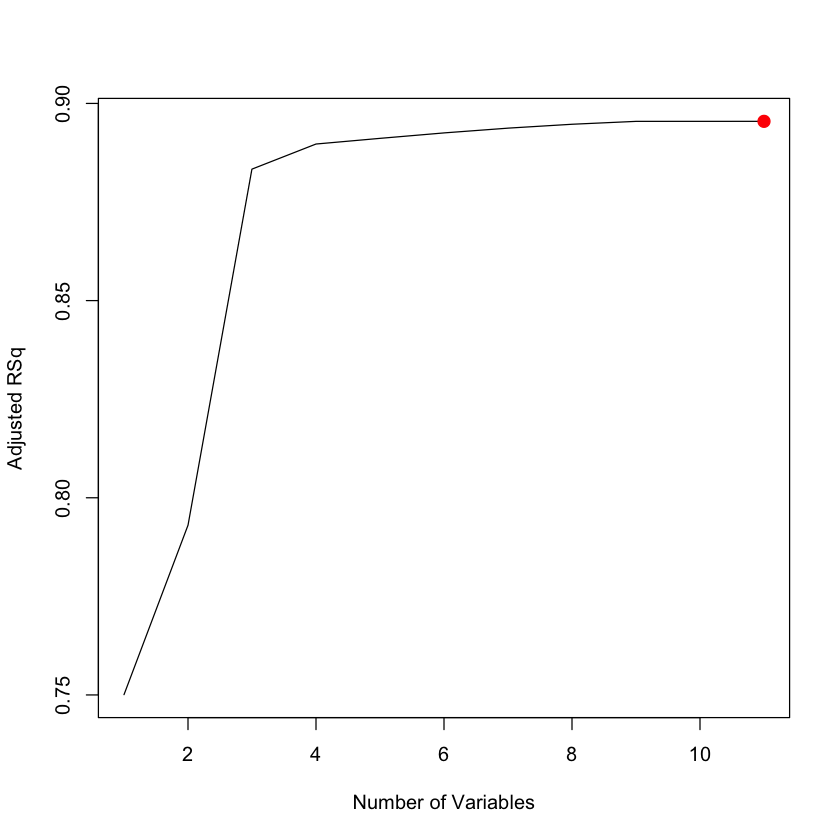

[1] 9

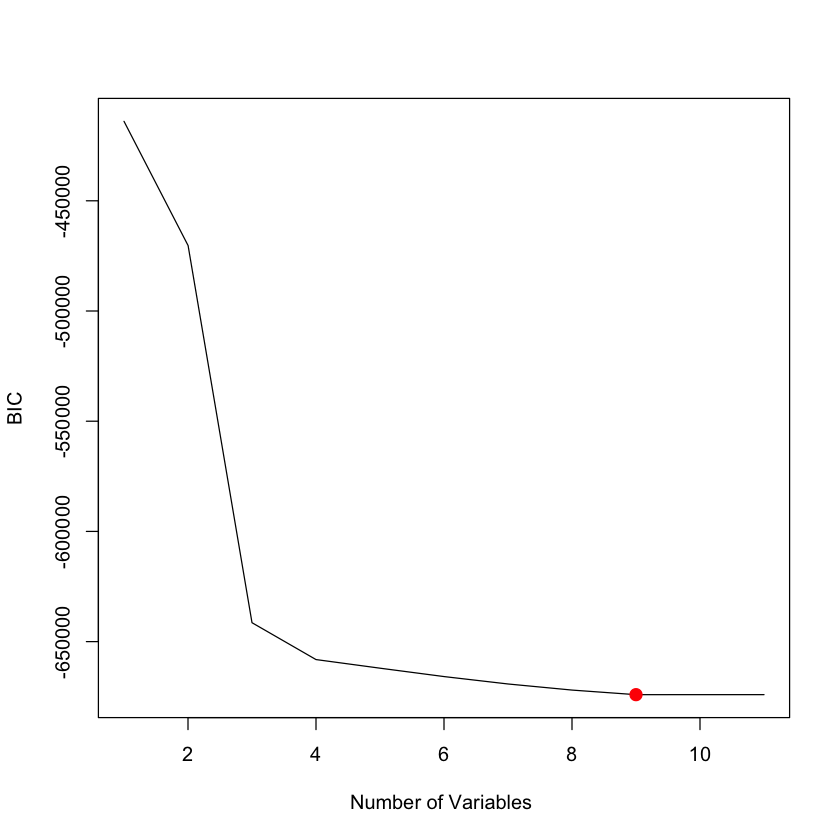

In [22]:
options(repr.plot.width = 7, repr.plot.height = 7)
par(bg = "white")


plot(rs$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")
which.max(rs$adjr2)
points(which.max(rs$adjr2), rs$adjr2[which.max(rs$adjr2)],
       col = "red", cex = 2, pch = 20)

plot(rs$bic, xlab = "Number of Variables ", ylab = "BIC", type = "l")
which.min(rs$bic)
points(which.min(rs$bic), rs$bic[which.min(rs$bic)],
       col = "red", cex = 2, pch = 20)

In [23]:
## Calculating MSPE of each of the 11 models

# Assigning the best models best on the truth values of the features
m1 <- lm(Salnty ~ STheta, data = traindf)
m2 <- lm(Salnty ~ STheta + O2ml_L, data = traindf)
m3 <- lm(Salnty ~ STheta + O2Sat + Oxymol, data = traindf)
m4 <- lm(Salnty ~ STheta + O2Sat + Oxymol + SiO3uM, data = traindf)

m5 <- lm(Salnty ~ STheta + O2Sat + Oxymol + SiO3uM + PO4uM, data = traindf)
m6 <- lm(Salnty ~ STheta + O2Sat + Oxymol +
           SiO3uM + PO4uM + Year, data = traindf)
m7 <- lm(Salnty ~ STheta + O2Sat + Oxymol +
           SiO3uM + O2ml_L + ChlorA + Year, data = traindf)
m8 <- lm(Salnty ~ STheta + O2Sat + Oxymol + PO4uM +
           SiO3uM + O2ml_L + ChlorA + Year, data = traindf)

m9 <- lm(Salnty ~ STheta + O2Sat + Oxymol + PO4uM +
           SiO3uM + O2ml_L + ChlorA + Year + Depthm, data = traindf)

m10 <- lm(Salnty ~ STheta + O2Sat + Oxymol + PO4uM +
            SiO3uM + O2ml_L + ChlorA + Year + Depthm + Phaeop, data = traindf)

m11 <- lm(Salnty ~ ., data = traindf)


pred1 <- predict(m1, newdata = testdf)
pred2 <- predict(m2, newdata = testdf)
pred3 <- predict(m3, newdata = testdf)
pred4 <- predict(m4, newdata = testdf)

pred5 <- predict(m5, newdata = testdf)
pred6 <- predict(m6, newdata = testdf)
pred7 <- predict(m7, newdata = testdf)
pred8 <- predict(m8, newdata = testdf)

pred9 <- predict(m9, newdata = testdf)
pred10 <- predict(m10, newdata = testdf)
pred11 <- predict(m11, newdata = testdf)



mspe <- rep(NA, 11)
mspe[1] <- mean((testdf$Salnty - pred1)^2)
mspe[2] <- mean((testdf$Salnty - pred2)^2)
mspe[3] <- mean((testdf$Salnty - pred3)^2)
mspe[4] <- mean((testdf$Salnty - pred4)^2)

mspe[5] <- mean((testdf$Salnty - pred5)^2)
mspe[6] <- mean((testdf$Salnty - pred6)^2)
mspe[7] <- mean((testdf$Salnty - pred7)^2)
mspe[8] <- mean((testdf$Salnty - pred8)^2)

mspe[9] <- mean((testdf$Salnty - pred9)^2)
mspe[10] <- mean((testdf$Salnty - pred10)^2)
mspe[11] <- mean((testdf$Salnty - pred11)^2)


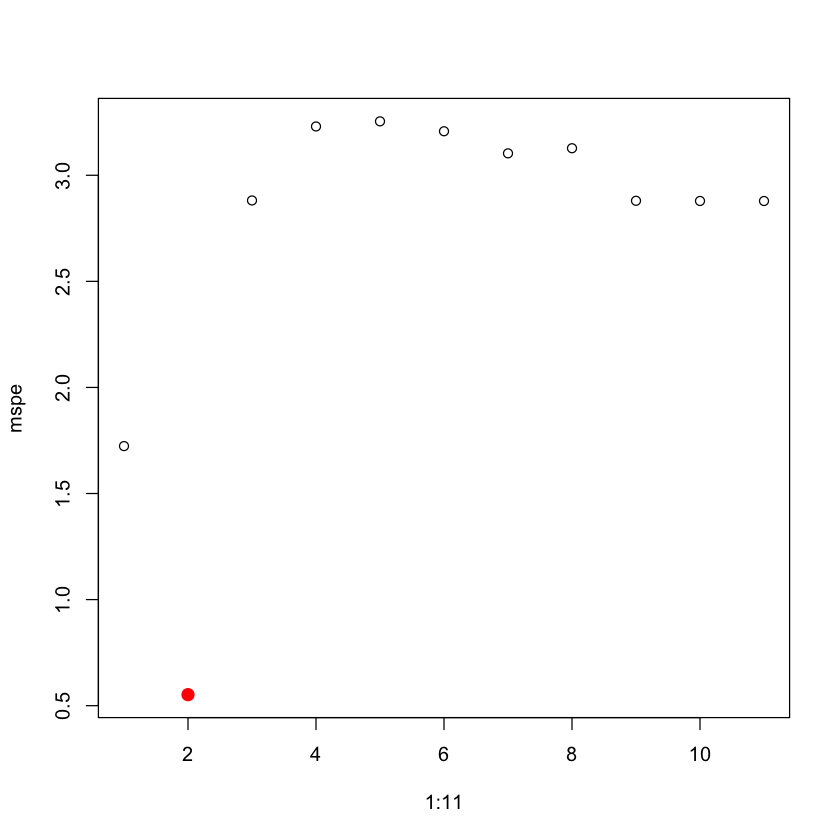

In [24]:
par(bg = "white")
plot(x = 1:11, y = mspe)
points(which.min(mspe), mspe[which.min(mspe)],
       col = "red", cex = 2, pch = 20)

From the above plots, the best performing models are the ones with 11, 9 and 2 features respectively for R2a, BIC and MSPE.

#### Checking for collinearity

In [25]:
library(car)

Loading required package: carData



In [26]:
vif(m11)
vif(m9)
vif(m2)

Depthm     O2ml_L     STheta      O2Sat     Oxymol     ChlorA     Phaeop 
  4.369503 690.265046  13.286549 284.325621 900.411157   2.093212   2.137269 
     PO4uM     SiO3uM      NO2uM       Year 
 41.294372  20.038214   1.187104   1.036516

STheta      O2Sat     Oxymol      PO4uM     SiO3uM     O2ml_L     ChlorA 
 13.273755 280.839462 896.282480  41.217711  20.026371 690.225362   1.137726 
      Year     Depthm 
  1.033769   4.360011

STheta   O2ml_L 
4.466969 4.466969

We see that the models with 9 and 11 features have high collinearity, since the VIF values are greater than 5 for many of the variables in those models. Whereas for the model with 2 features, both the VIF values are less than 5 which suggests no collinearity between the features. 

Also considering parsimony, I believe model 2 is the best model, since it has the best performance based on MSPE, performs relatively well in terms of BIC and R2a and does not have any redundant features. Thus, the chosen best model is:
\begin{align*}
\text{Salnty} = 28.7911722 + 0.2048749 \times \text{STheta} - 0.0928460 \times \text{O2ml\_L}
\end{align*} 

In [27]:
summary(m2)


Call:
lm(formula = Salnty ~ STheta + O2ml_L, data = traindf)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3001 -0.0792  0.0064  0.0781  3.0933 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.7911722  0.0205452  1401.4   <2e-16 ***
STheta       0.2048749  0.0007508   272.9   <2e-16 ***
O2ml_L      -0.0928460  0.0003730  -248.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1833 on 298555 degrees of freedom
Multiple R-squared:  0.793,	Adjusted R-squared:  0.793 
F-statistic: 5.719e+05 on 2 and 298555 DF,  p-value: < 2.2e-16


### Model diagnostics

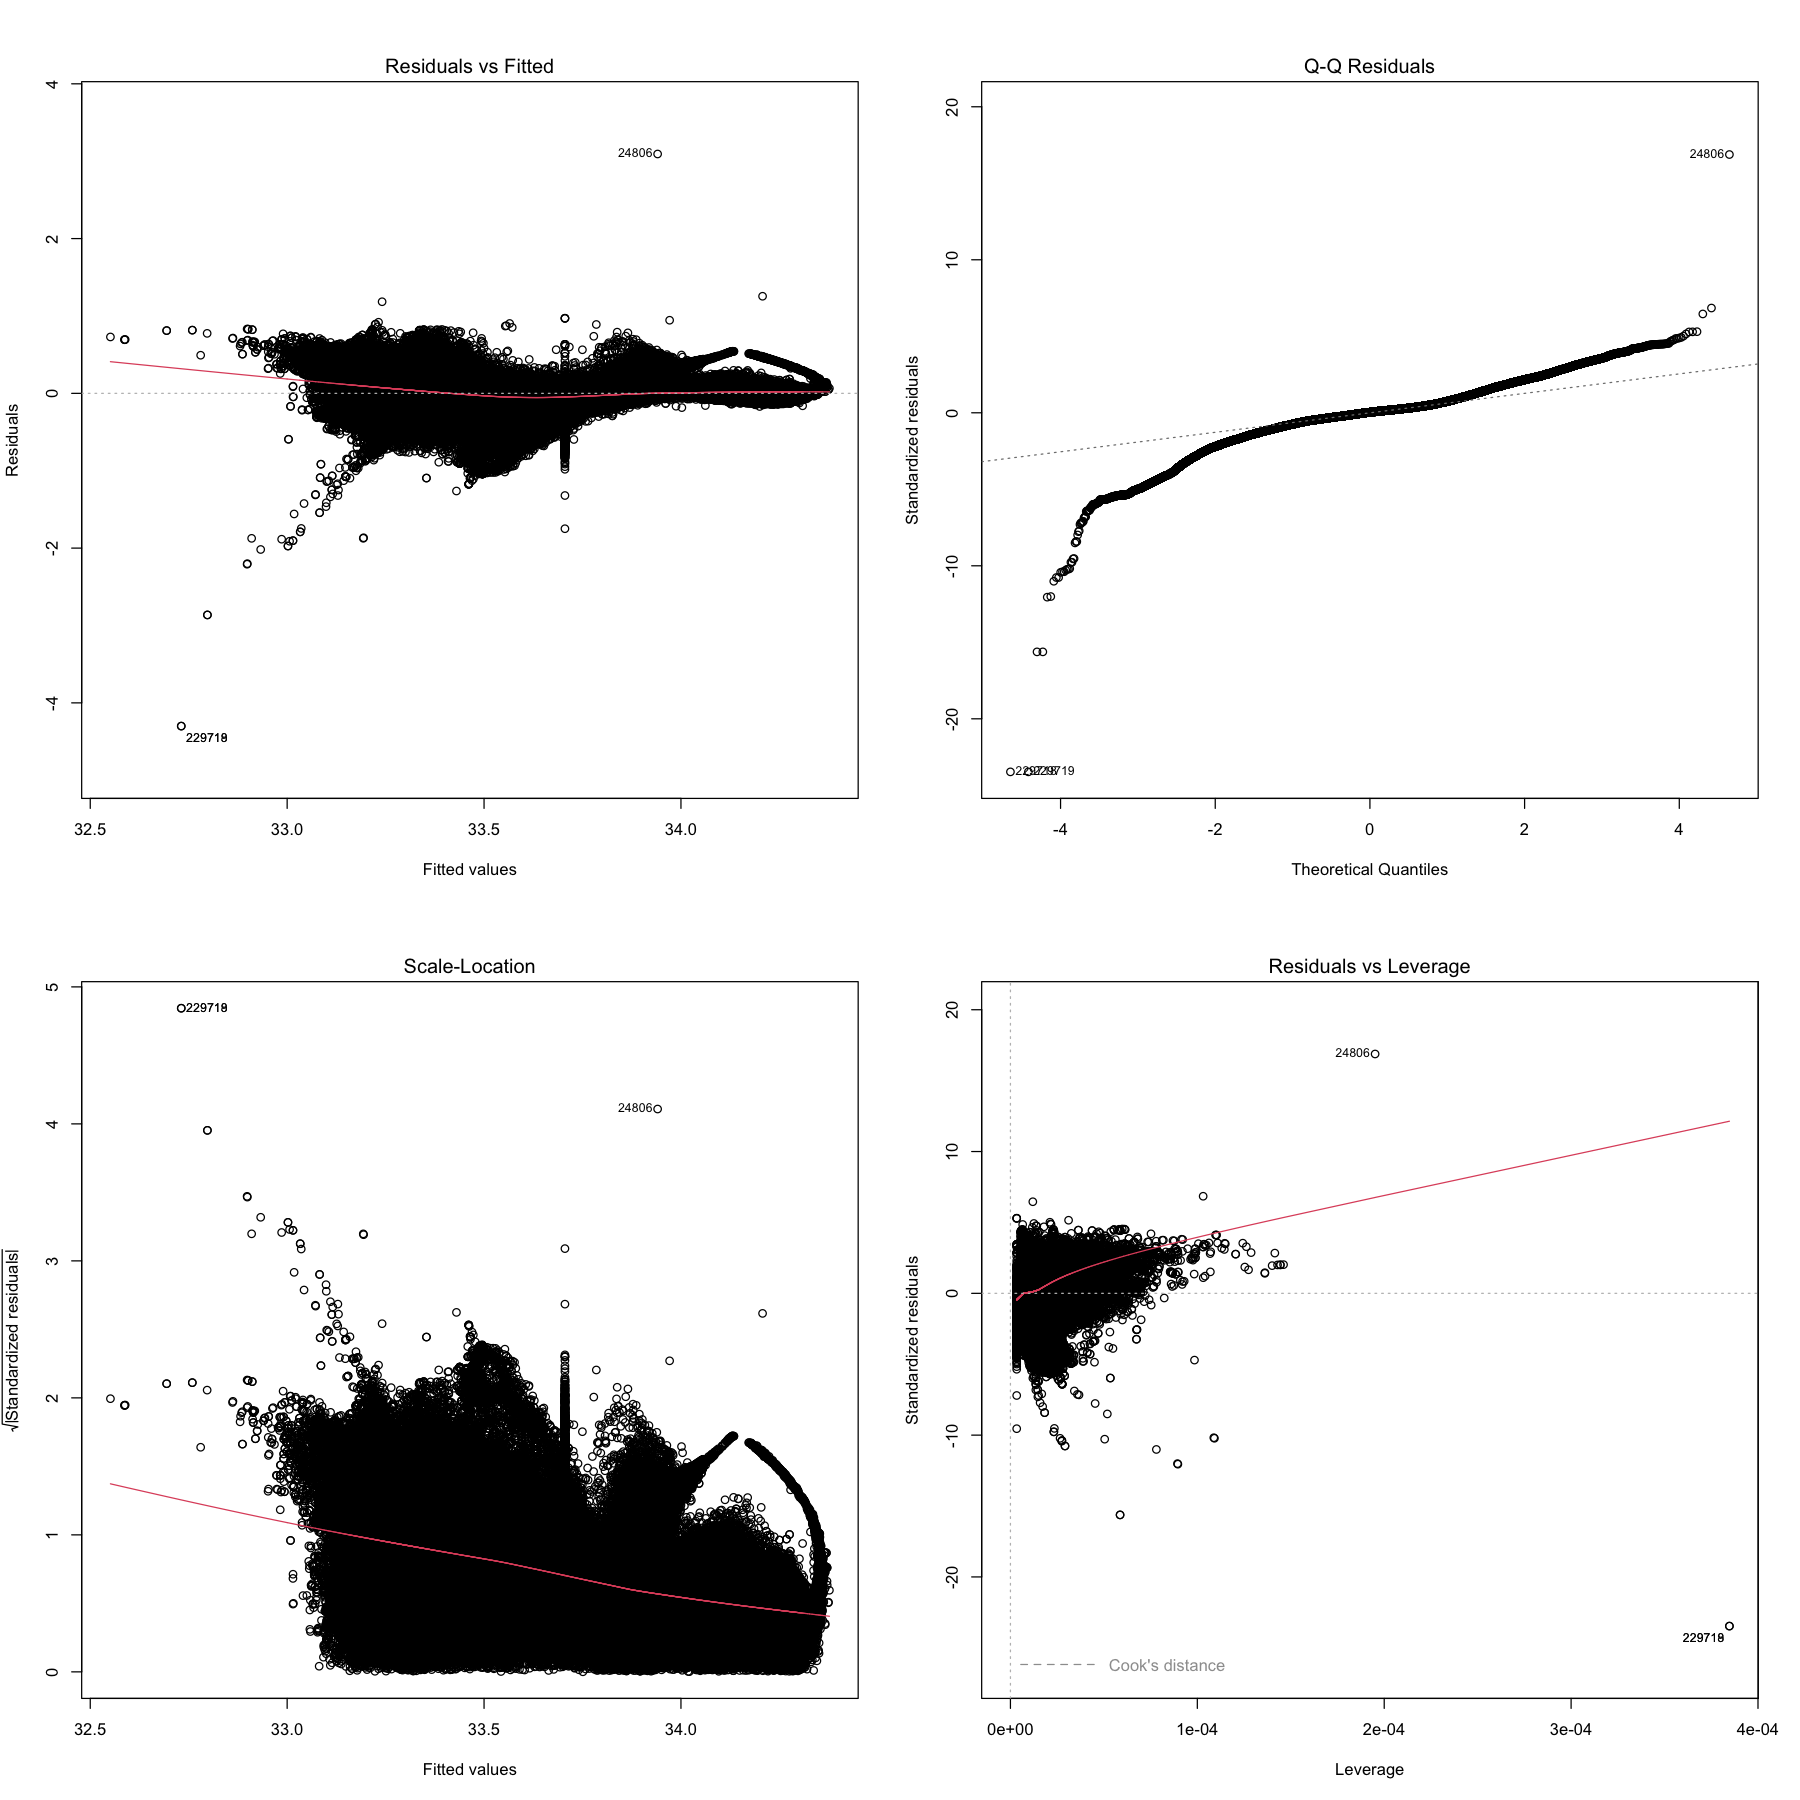

In [30]:
par(mfrow = c(2, 2))
par(bg = "white")
options(repr.plot.width = 15, repr.plot.height = 15)
plot(m2)

From the Residuals vs Fitted plot, we see that the residuals are pretty random, but there is a slight pattern where the variance of the residual values decrease when the fitted values are high, suggesting that they may not be fully independent. 

The pattern in the residual plot also suggests that the constant variance assumption might be erroneous since we should have expected a band of uniform width in that case. 

The Q-Q plot suggests the normality assumption may also be violated, since at the edges, the model deviates quite a bit.

From the leverage plot, there are no points with Cook's distance > 0.5, indicating the absense of influential points which is a good thing. 

### Kernel Regression

With some of the violations of the assumptions of the linear regression model, I would like to consider a kernel regression model with STheta as the variable. I'm choosing this, since the coefficient of STheta is higher than that of O2ml_L, despite the fact that the scale of the STheta variable is higher (20.93 to 28.14 for Stheta compared to -0.01 to 11.13 for O2ml_L). This suggests that STheta is a stronger influencer on Salnty (higher increase in Salnty for unit change in STheta compared to unit change in O2ml_L).

In [34]:
summary(traindf)

     Depthm           Salnty          O2ml_L           STheta     
 Min.   :   0.0   Min.   :28.43   Min.   :-0.010   Min.   :20.93  
 1st Qu.:  37.0   1st Qu.:33.40   1st Qu.: 2.210   1st Qu.:24.88  
 Median : 101.0   Median :33.68   Median : 3.758   Median :25.80  
 Mean   : 166.8   Mean   :33.71   Mean   : 3.765   Mean   :25.70  
 3rd Qu.: 250.0   3rd Qu.:34.07   3rd Qu.: 5.660   3rd Qu.:26.54  
 Max.   :4442.0   Max.   :37.03   Max.   :11.130   Max.   :28.14  
     O2Sat            Oxymol             ChlorA            Phaeop       
 Min.   : -0.10   Min.   : -0.4349   Min.   :-0.0010   Min.   :-3.8900  
 1st Qu.: 33.60   1st Qu.: 96.1958   1st Qu.: 0.1100   1st Qu.: 0.0800  
 Median : 62.64   Median :163.6312   Median : 0.4395   Median : 0.1908  
 Mean   : 62.70   Mean   :163.9198   Mean   : 0.4422   Mean   : 0.1916  
 3rd Qu.:100.50   3rd Qu.:246.4232   3rd Qu.: 0.4395   3rd Qu.: 0.1908  
 Max.   :214.10   Max.   :485.7018   Max.   :66.1100   Max.   :10.6600  
     PO4uM          

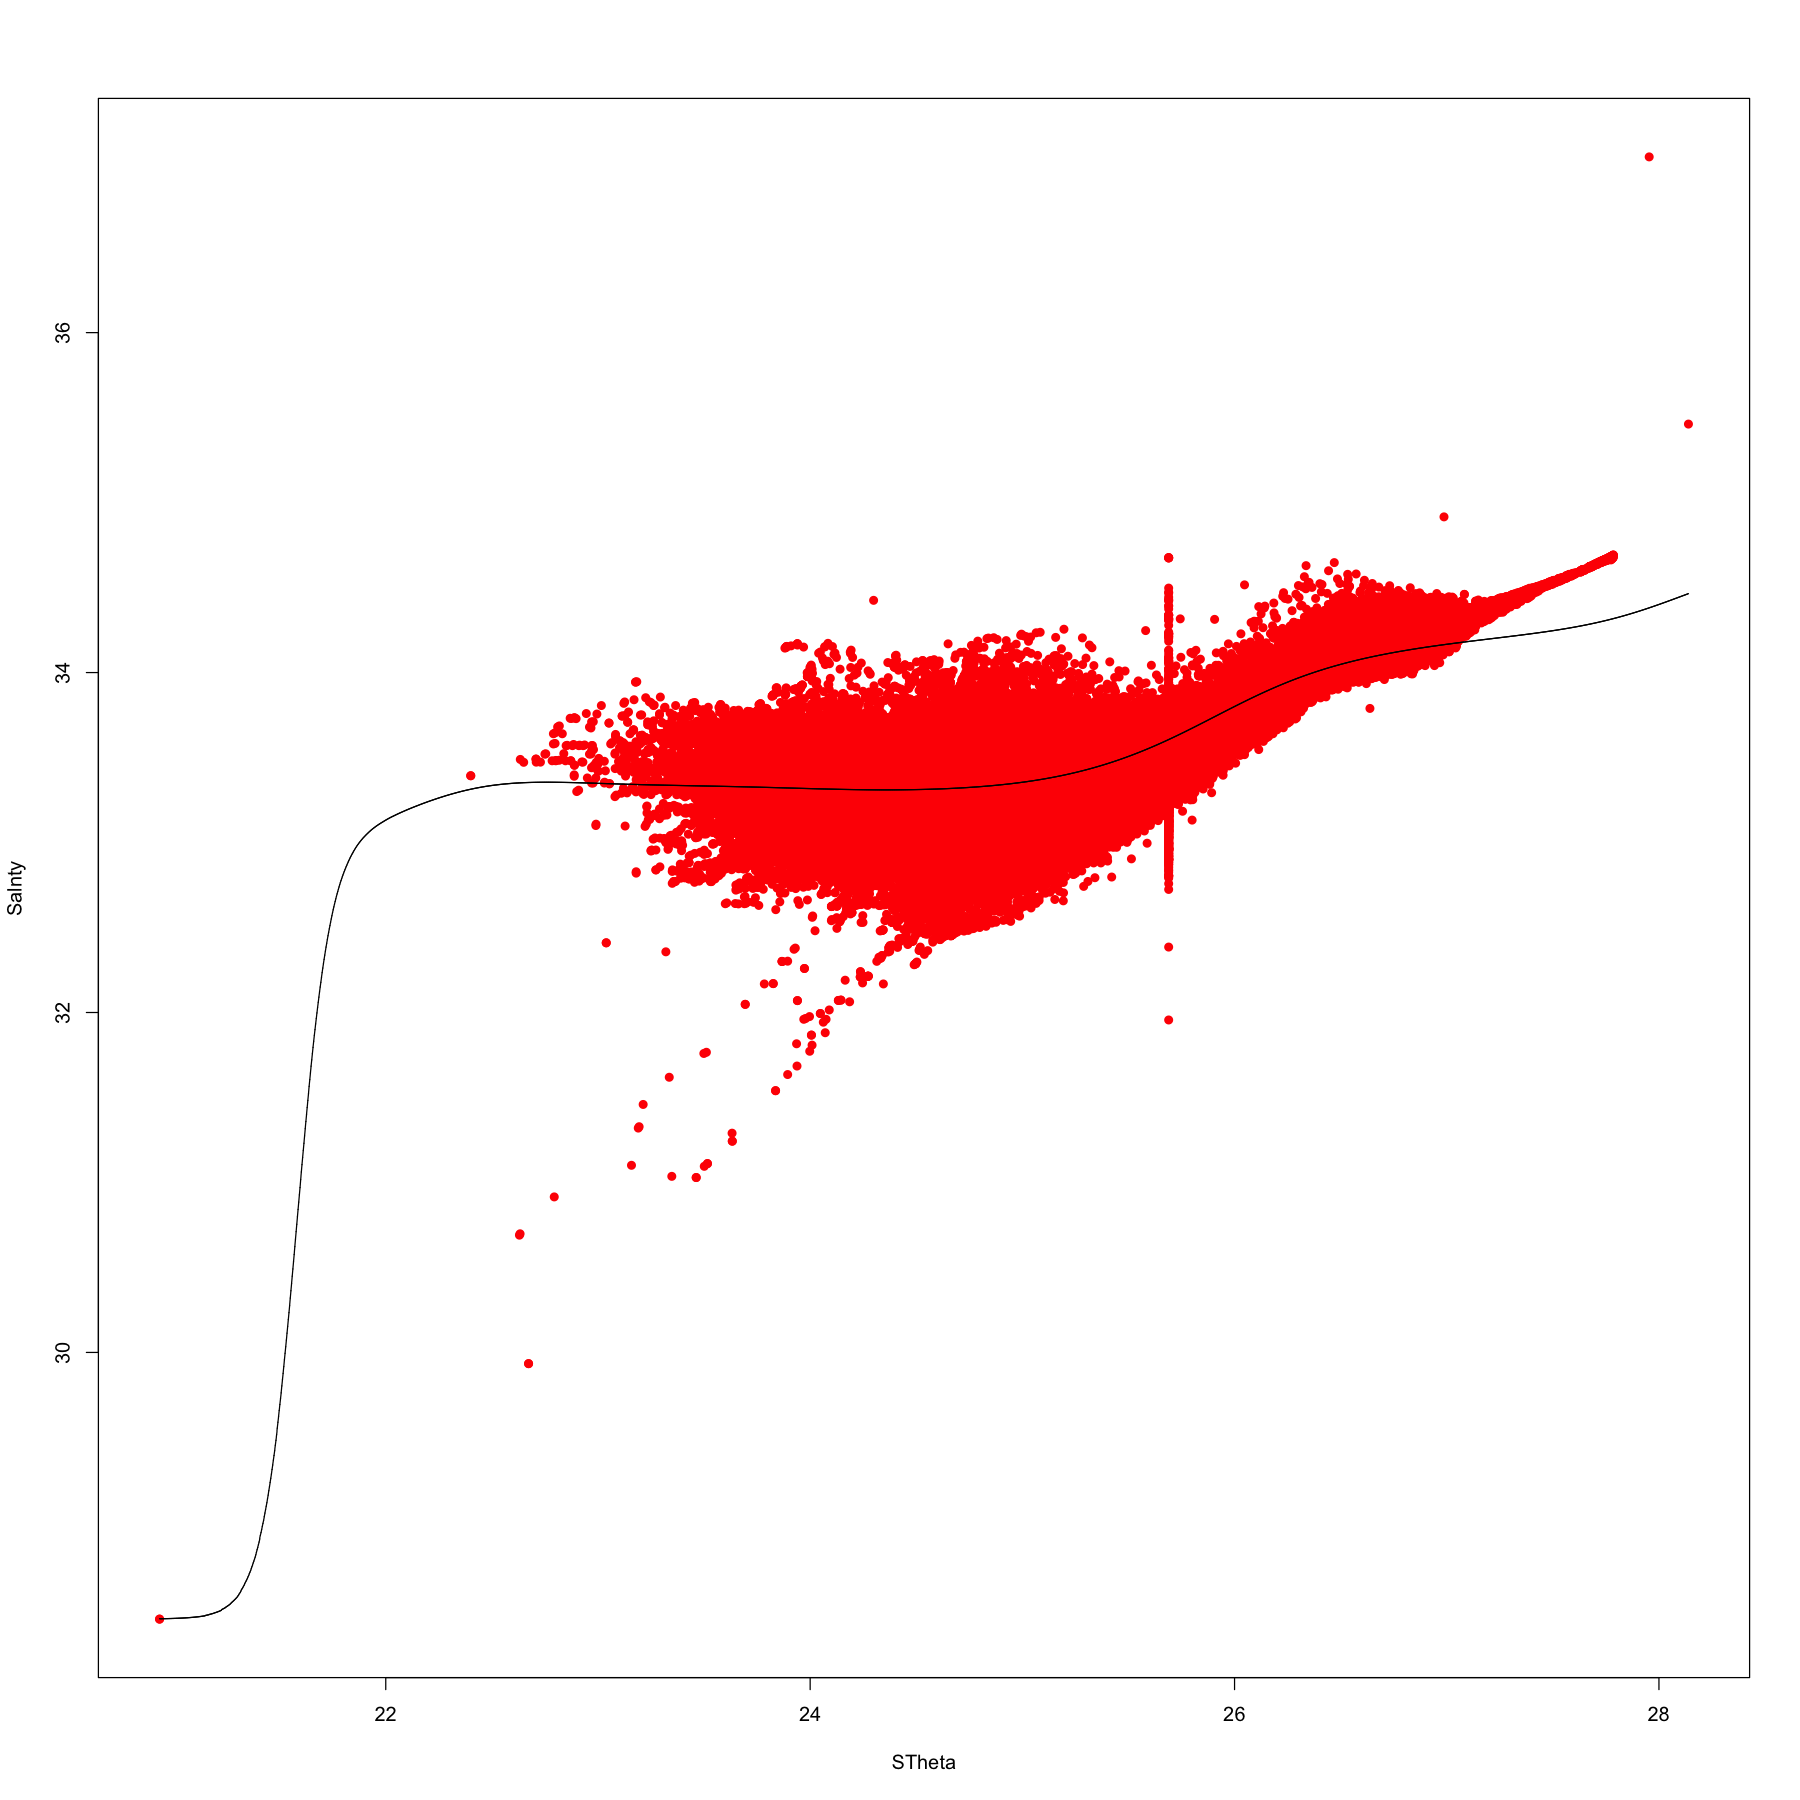

In [35]:
par(bg = 'white')
with(traindf, plot(Salnty ~ STheta, pch = 16, col = "red"))
with(traindf, lines(ksmooth(STheta, Salnty, "normal", 1)))


In [43]:
library(mgcv)

Loading required package: nlme

This is mgcv 1.9-1. For overview type 'help("mgcv-package")'.



In [44]:
kern <- gam(Salnty ~ s(STheta, bs = "cr", k = 1),
            data = traindf, method = "REML")

pred_kern <- predict(kern, newdata = testdf, type = "response")
mspe_lin <- mean((testdf$Salnty - pred2)^2)
mspe_kern <- mean((testdf$Salnty - pred_kern)^2)
mspe_lin    # Linear model
mspe_kern   # Kernel model

Warning message in smooth.construct.cr.smooth.spec(object, dk$data, dk$knots):
"basis dimension, k, increased to minimum possible
"


[1] 0.5519141

[1] 7.810933

# Synopsis

## Background : 

I was interested in this problem because of my childhood interest in Marine Biology. I found a dataset that was tangential to this field, where I could study how oceanographic quantities affect species diversity in the ocean. The CalCOFI dataset represents the longest (1949 - present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data captured in the world. This database contains oceanographic data measured using CTD casts from seawater samples collected at CalCOFI stations. 

CTD stands for conductivity, temperature, and depth, and refers to a package of electronic instruments that measure oceanographic properties (i.e., the physical features of seawater such as salinity, dissolved oxygen, chlorophyll-a, nutrients, and many more). A CTD cast gives scientists a precise and comprehensive charting of the distribution and variation of water oceanographic properties that helps to understand how the oceans affect life. 

Salinity plays a key role in analyzing the water cycle, ocean circulation, and climate change, as it drives ocean currents and circulation patterns. Variations in salinity affect the density of seawater, which in turn influences its movement and mixing. Many marine organisms have adapted to specific salinity levels, so variations in salinity can directly impact their distribution, reproduction, and survival.

The dataset used for this project can be downloaded from :
https://drive.google.com/file/d/1EspgcE5t9VHvk338_uNesCfhNZWDPVnB/view?usp=drive_link

The dataset contains 325,281 rows and 16 oceanographic features and one outcome variable - salinity of the water (Salnty). Description of all the variables:

1. Salnty: Salinity (Practical Salinity Scale 1978) (outcome) 
2. Depthm: cast depth in meters
3. O2mlL: Milliliters oxygen per liter of seawater
4. STheta: Potential Density (Sigma Theta), Kg/M3
5. O2Sat: Oxygen percent saturation
6. Oxyμmol/Kg: Oxygen micromoles per kilogram seawater
7. ChlorA: Migrograms Chlorophyll-a per liter seawater, measured fluorometrically 
8. Phaeop: Micrograms Phaeopigment per liter seawater, measured fluormetrically 
9. PO4uM: Micromoles Phosphate per liter of seawater
10. SiO3uM: Micromoles Silicate per liter of seawater
11. NO2uM: Micromoles Nitrite per liter of seawater
12. NH3uM: Micromoles Ammonia per liter of seawater
13. C14As1: 14C Assimilation of Replicate 1 (milligrams carbon per cubic meter of seawater per half light day)
14. C14As2: 14C Assimilation of Replicate 2 (milligrams carbon per cubic meter of seawater per half light day)
15. DarkAs: 14C Assimilation of Dark/Control Bottle (milligrams carbon per cubic meter of seawater per half light day)
16. LightP : Light intensities of the incubation tubes in the primary productivity experiment, expressed as percentages
17. Year: The year the sample was collected

In this project, I have attempted to obtain a reliable model to predict the salinity of ocean water using a subset of these oceanographic features. Accurate prediction of salinity at any location in the ocean can be used to identify more efficient mechanisms to optimally conserve the habitat of marine species and thereby enhance stability and preservation of the environment in the face of global climate change.

## Methods and Conclusion

For exploaratory data analysis, I looked at the individual plots of each feature against the outcome, and the correlation between all the features. The scatter plots conveyed the presence of patterns (seemingly linear) and the correlation heatmap concurred. Thus, I decided to create a linear regression model to predict the salinity. 

Initially, I had to perform pre-processing on the data to clean it and fill in any missing values. Some of the features had few rows of data available, so I decided to remove those features and work with a smaller subset of features. I then filled any missing values in the other features with their respective column means to prepare for linear regression modelling. I also split the dataset into training and test datasets based on the year (before 2013 as training and after that as test), since I wanted to mimic reality to predict the salinity in the future years based on the past.

On performing Multiple Linear Regression, I fit a full model with all the features. I then performed F-tests on the model to identify that a trivial model with no features will indeed not predict the outcome as well as a linear model would. 

I performed model selection to obtain the best model for different numbers of features. Out of these models, I used different evaluation criteria like BIC, MSPE and R2a to identify the best performing model. The final model I landed on was:
\begin{align*}
\text{Salnty} = 28.7911722 + 0.2048749 \times \text{STheta} - 0.0928460 \times \text{O2ml\_L}
\end{align*} 

I then performed model diagnostics, and found that some of the assumptions for MLR were violated. I then fit a kernel regression model using just the STheta feature and saw that it explained the behaviour a little better. However, its MSPE performance was not as good as that of the linear model.

In conclusion, I believe the above linear model is a good predictor for the salinity of ocean water.

